In [1]:
from PIL import Image
from glob import glob
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

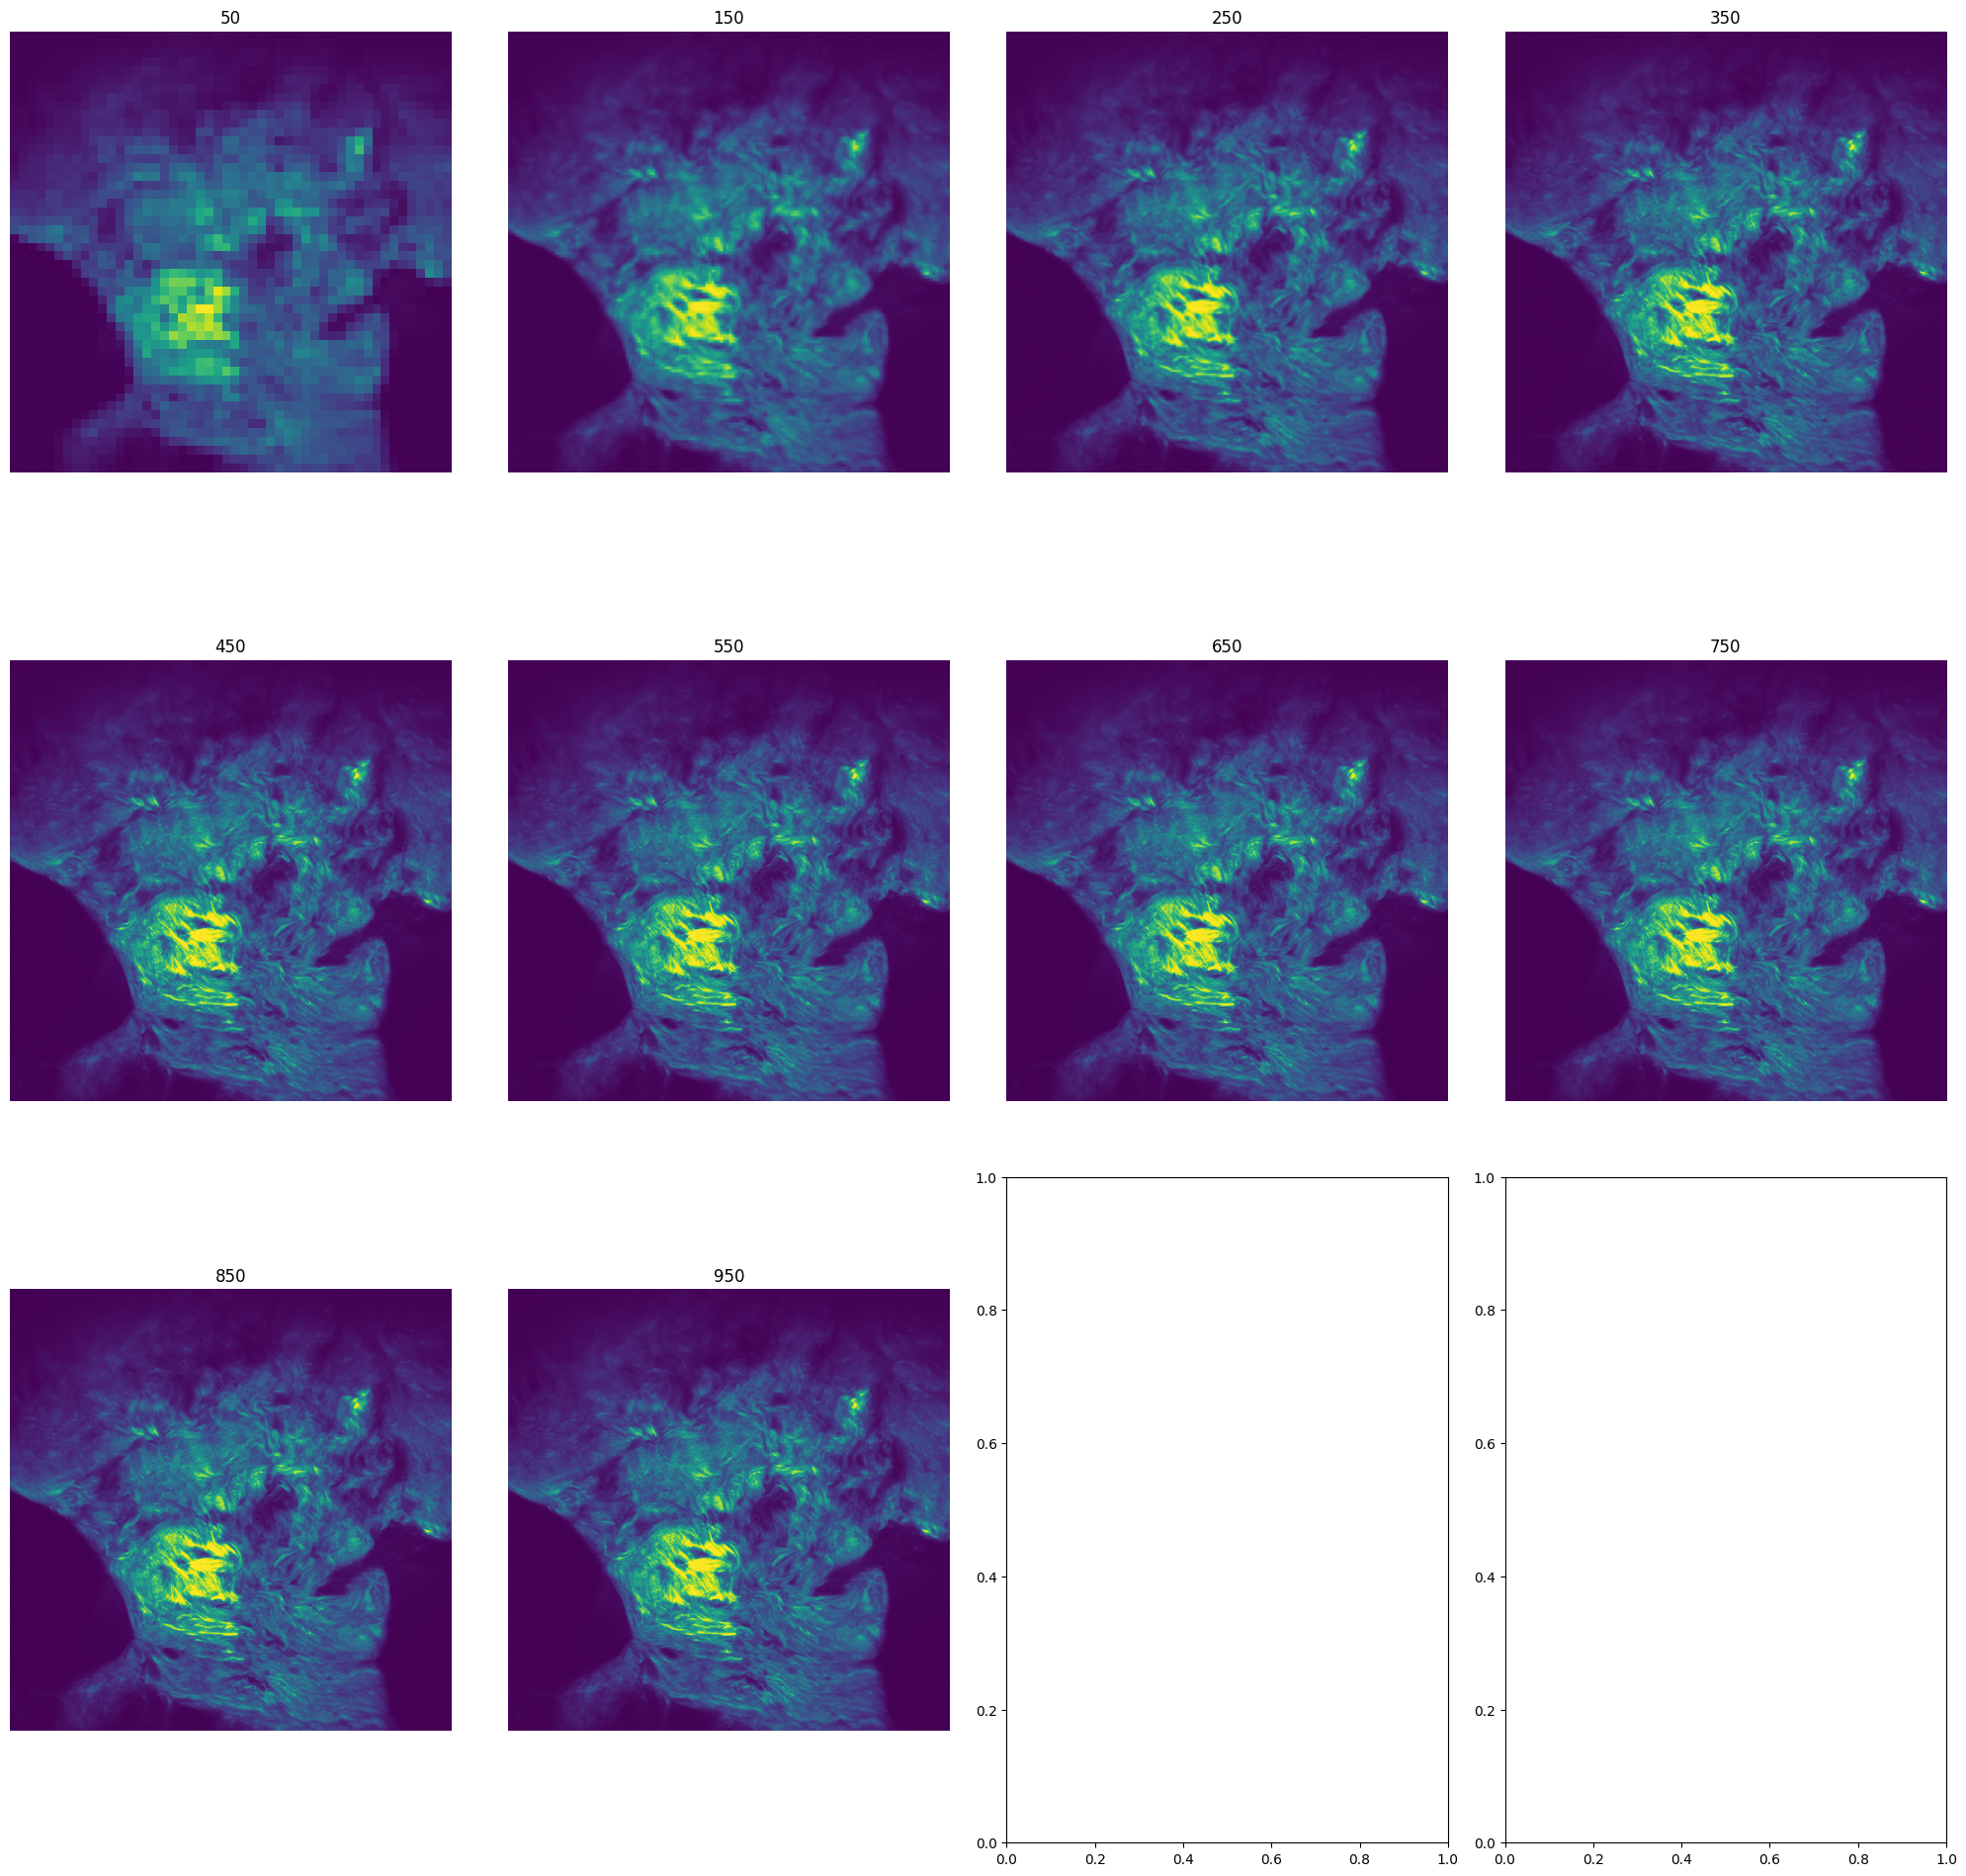

In [2]:
image_path = "../data/grayscale/z-stacks/48/6.bmp"
fig, axs = plt.subplots(3, 4, figsize=(20, 20), tight_layout=True)
for i, temp_size in enumerate(np.arange(50, 1000, 100)):
    ax = axs.flat[i]
    ax.imshow(Image.open(image_path).resize((temp_size, temp_size)))
    ax.set_title(temp_size)
    ax.set_axis_off()
plt.show()

In [8]:
image_paths = glob(f"../data/preprocessed/z-stacks/**/*.bmp")
size = 500
output_path = f"../data/preprocessed/resized/{size}/z-stacks"

In [11]:
for image_path in tqdm(image_paths):
    stack_id = image_path.split('/')[-2]
    slice_fn = image_path.split('/')[-1]

    img = Image.open(image_path)
    resized_img = img.resize((size, size))

    if not os.path.exists(f"{output_path}/{stack_id}"):
        os.makedirs(f"{output_path}/{stack_id}")

    img.save(f"{output_path}/{stack_id}/{slice_fn}")

100%|██████████| 1905/1905 [00:54<00:00, 34.74it/s]
